In [4]:
""" Multilayer Perceptron.

A Multilayer Perceptron (Neural Network) implementation example using
TensorFlow library. This example is using the MNIST database of handwritten
digits (http://yann.lecun.com/exdb/mnist/).

Links:
    [MNIST Dataset](http://yann.lecun.com/exdb/mnist/).

Author: Saleem Ahmed
Project: https://github.com/crazysal/MNIST-Logistic-Regression-MLP-CNN
"""

from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf

# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [5]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
# n_hidden_2 = 256 # 2nd layer number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))
    
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [6]:
# Create model
def multilayer_perceptron(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer

In [7]:
# Construct model
logits = multilayer_perceptron(X)

In [8]:
# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

In [9]:
# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x,
                                                            Y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
    print("Optimization Finished!")

    # Test model
    pred = tf.nn.softmax(logits)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy of MNIST Train Data:", accuracy.eval({X: mnist.train.images, Y: mnist.train.labels}))
    print("Accuracy of MNIST Validation Data:", accuracy.eval({X: mnist.validation.images, Y: mnist.validation.labels}))
    print("Accuracy of MNIST Test Data:", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))
    
    print("Accuracy for USPS Numerals:", accuracy.eval({X: USPS_img_array, Y: USPS_label_array}))

Epoch: 0001 cost=28.324336378
Epoch: 0002 cost=7.932121539
Epoch: 0003 cost=5.924172065
Epoch: 0004 cost=4.858874294
Epoch: 0005 cost=4.193946858
Epoch: 0006 cost=3.678970504
Epoch: 0007 cost=3.307560816
Epoch: 0008 cost=3.022878025
Epoch: 0009 cost=2.757018665
Epoch: 0010 cost=2.590802059
Epoch: 0011 cost=2.385162545
Epoch: 0012 cost=2.282708634
Epoch: 0013 cost=2.107260968
Epoch: 0014 cost=2.006777644
Epoch: 0015 cost=1.888892937
Optimization Finished!
Accuracy of MNIST Train Data: 0.900818
Accuracy of MNIST Validation Data: 0.8888
Accuracy of MNIST Test Data: 0.8879
Accuracy for USPS Numerals: 0.321866


In [2]:
def get_my_usps_data(): 
    import zipfile
    import os
    from PIL import Image
    import PIL.ImageOps  
    import numpy as np
    import tensorflow  as tf
    import matplotlib.pyplot as plt

    filename="usps_dataset_handwritten.zip"

    #Defining height,width for resizing the images to 28x28 like MNIST digits
    height=28
    width=28

    #Defining path for extracting dataset zip file
    extract_path = "usps_data"

    #Defining image,label list
    images = []
    img_list = []
    labels = []

    #Extracting given dataset file    
    with zipfile.ZipFile(filename, 'r') as zip:
        zip.extractall(extract_path)

    #Extracting labels,images array needed for training    
    for root, dirs, files in os.walk("."):
        path = root.split(os.sep)

        if "Numerals" in path:
            image_files = [fname for fname in files if fname.find(".png") >= 0]
            for file in image_files:
                labels.append(int(path[-1]))
                images.append(os.path.join(*path, file)) 

    #Resizing images like MNIST dataset   
    for idx, imgs in enumerate(images):
        img = Image.open(imgs).convert('L') 
        img = img.resize((height, width), Image.ANTIALIAS)
        img_data = list(img.getdata())
        img_list.append(img_data)

    #Storing image and labels in arrays to be used for training   
    USPS_img_array = np.array(img_list)
    USPS_img_array = np.subtract(255, USPS_img_array)
    USPS_label_array = np.array(labels)
    #print(USPS_label_array.shape)
    nb_classes = 10
    targets = np.array(USPS_label_array).reshape(-1)
    aa = np.eye(nb_classes)[targets]
    USPS_label_array = np.array(aa, dtype=np.int32)
    #print(USPS_label_array)


    USPS_img_array = np.float_(np.array(USPS_img_array))
    for z in range(len(USPS_img_array)):
        USPS_img_array[z] /= 255.0 

    plt.imshow(USPS_img_array[19998].reshape(28,28))
    plt.show()
    
    
    return USPS_img_array, USPS_label_array


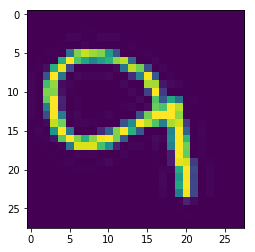

In [3]:

USPS_img_array, USPS_label_array = get_my_usps_data()